In [1]:
import numpy as np
import pandas as pd

In [2]:
url = ("http://hbiostat.org/data/repo/titanic3.xls")

df = pd.read_excel(url)
orig_df = df

In [3]:
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

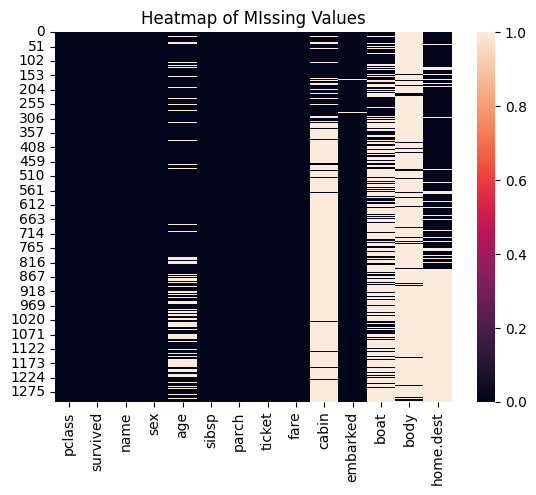

In [7]:
# Create a heatmap showing which cells in the dataframe have missing values
sns.heatmap(df.isna())

# Add title
plt.title('Heatmap of MIssing Values')

# Show plot
plt.show()

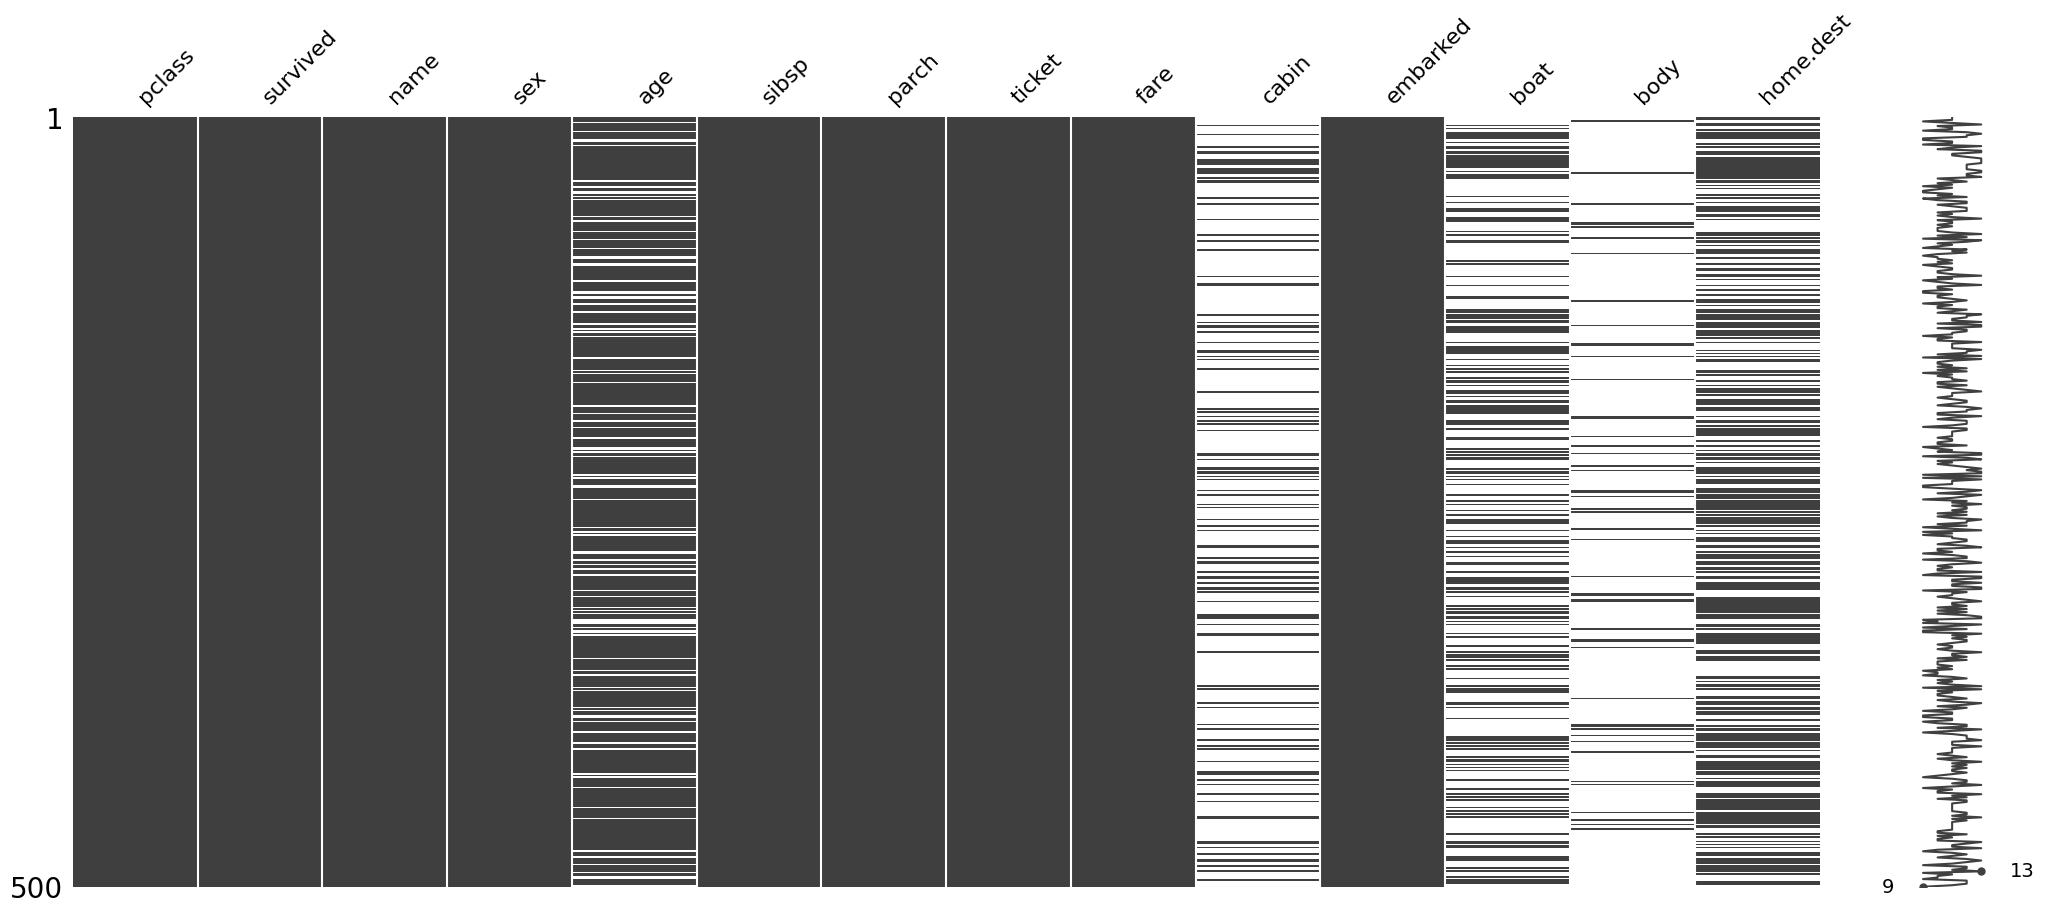

In [8]:
import missingno as msno
ax = msno.matrix(orig_df.sample(500))

<Axes: >

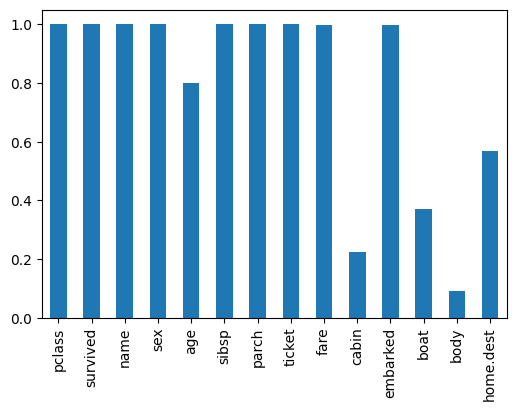

In [9]:
# Create report of missing values
fig, ax = plt.subplots(figsize=(6,4))
(1-df.isnull().mean()).abs().plot.bar(ax=ax)

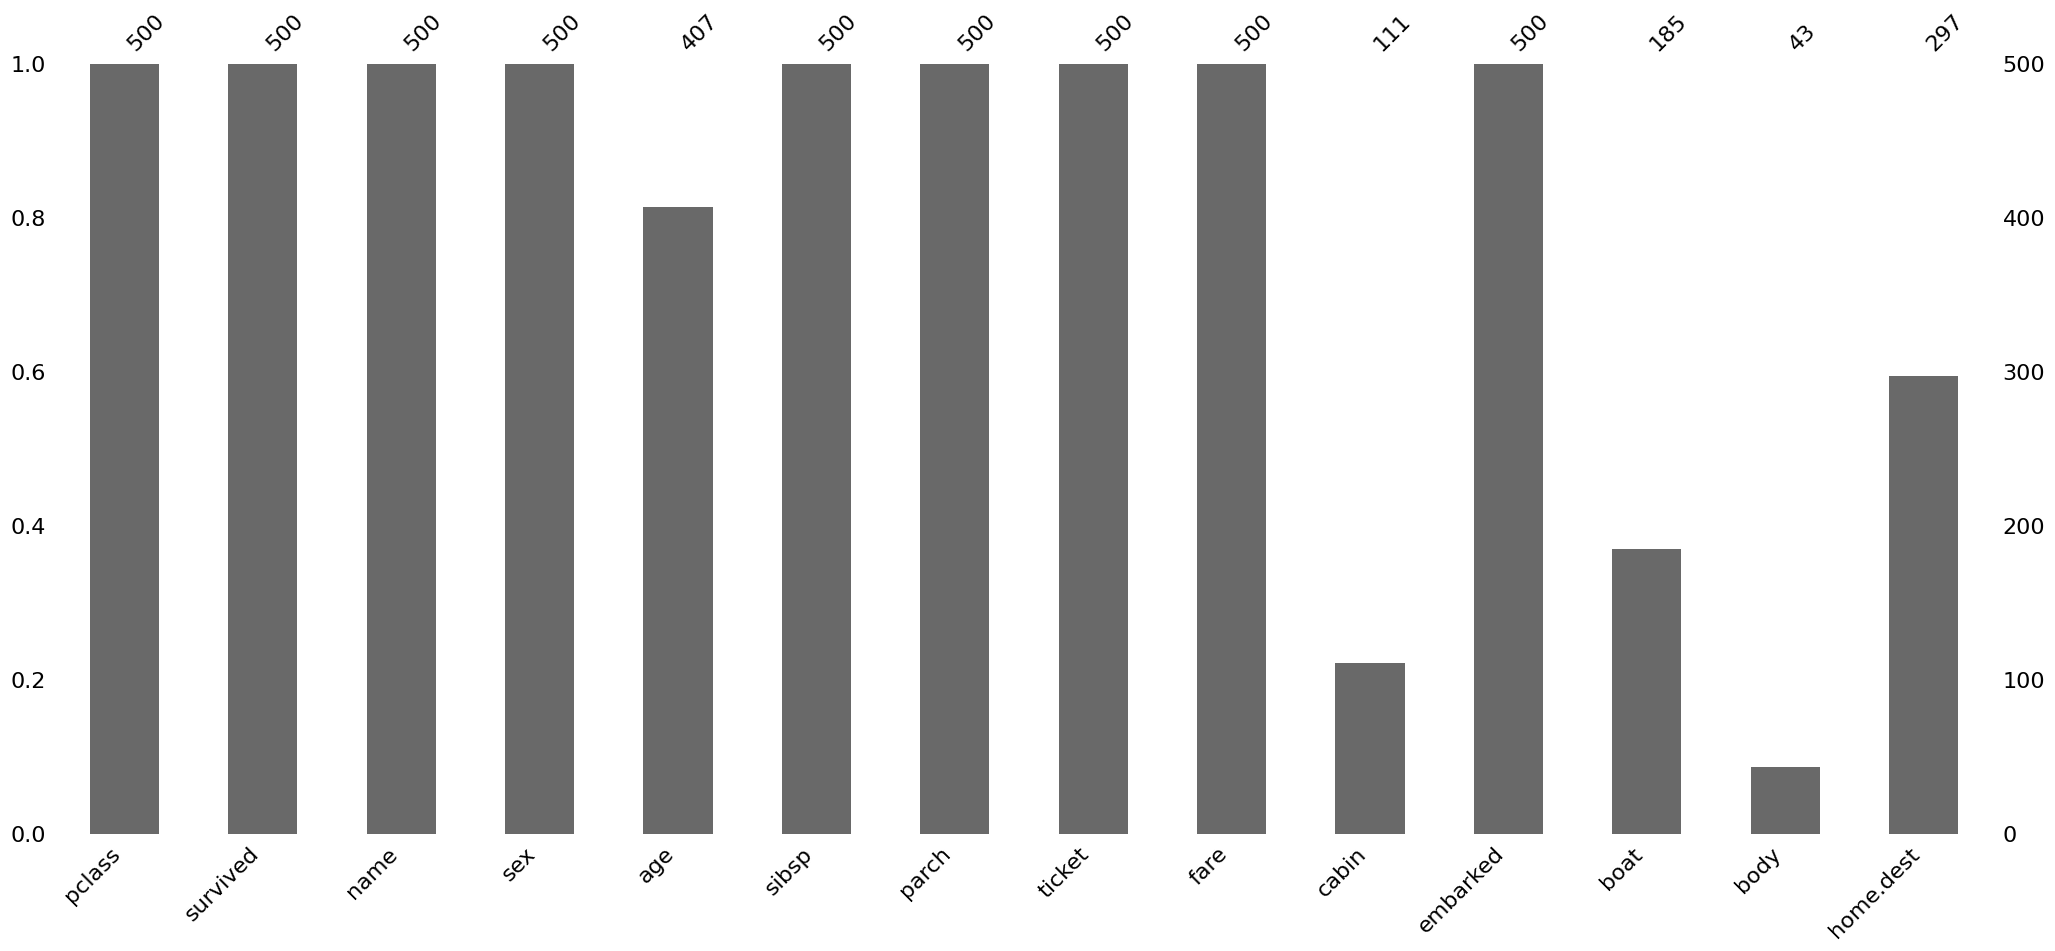

In [12]:
# Create report of missing values
ax = msno.bar(orig_df.sample(500))

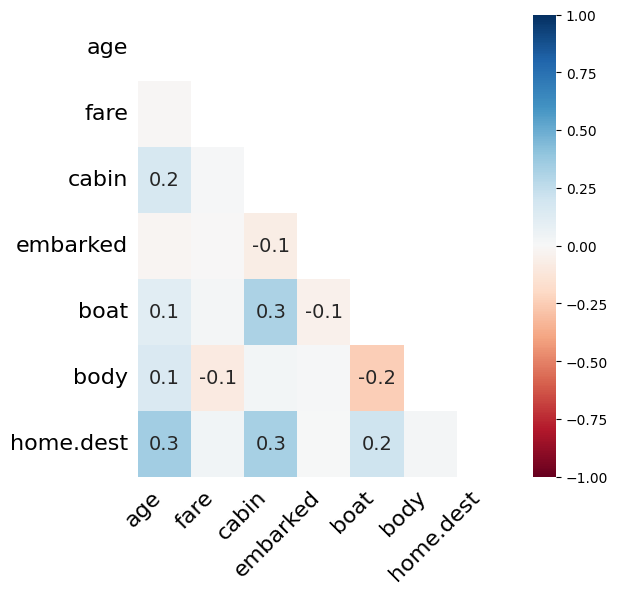

In [13]:
# Create heatmap showing if there are correlations where data is missing
ax = msno.heatmap(df, figsize=(6,6))

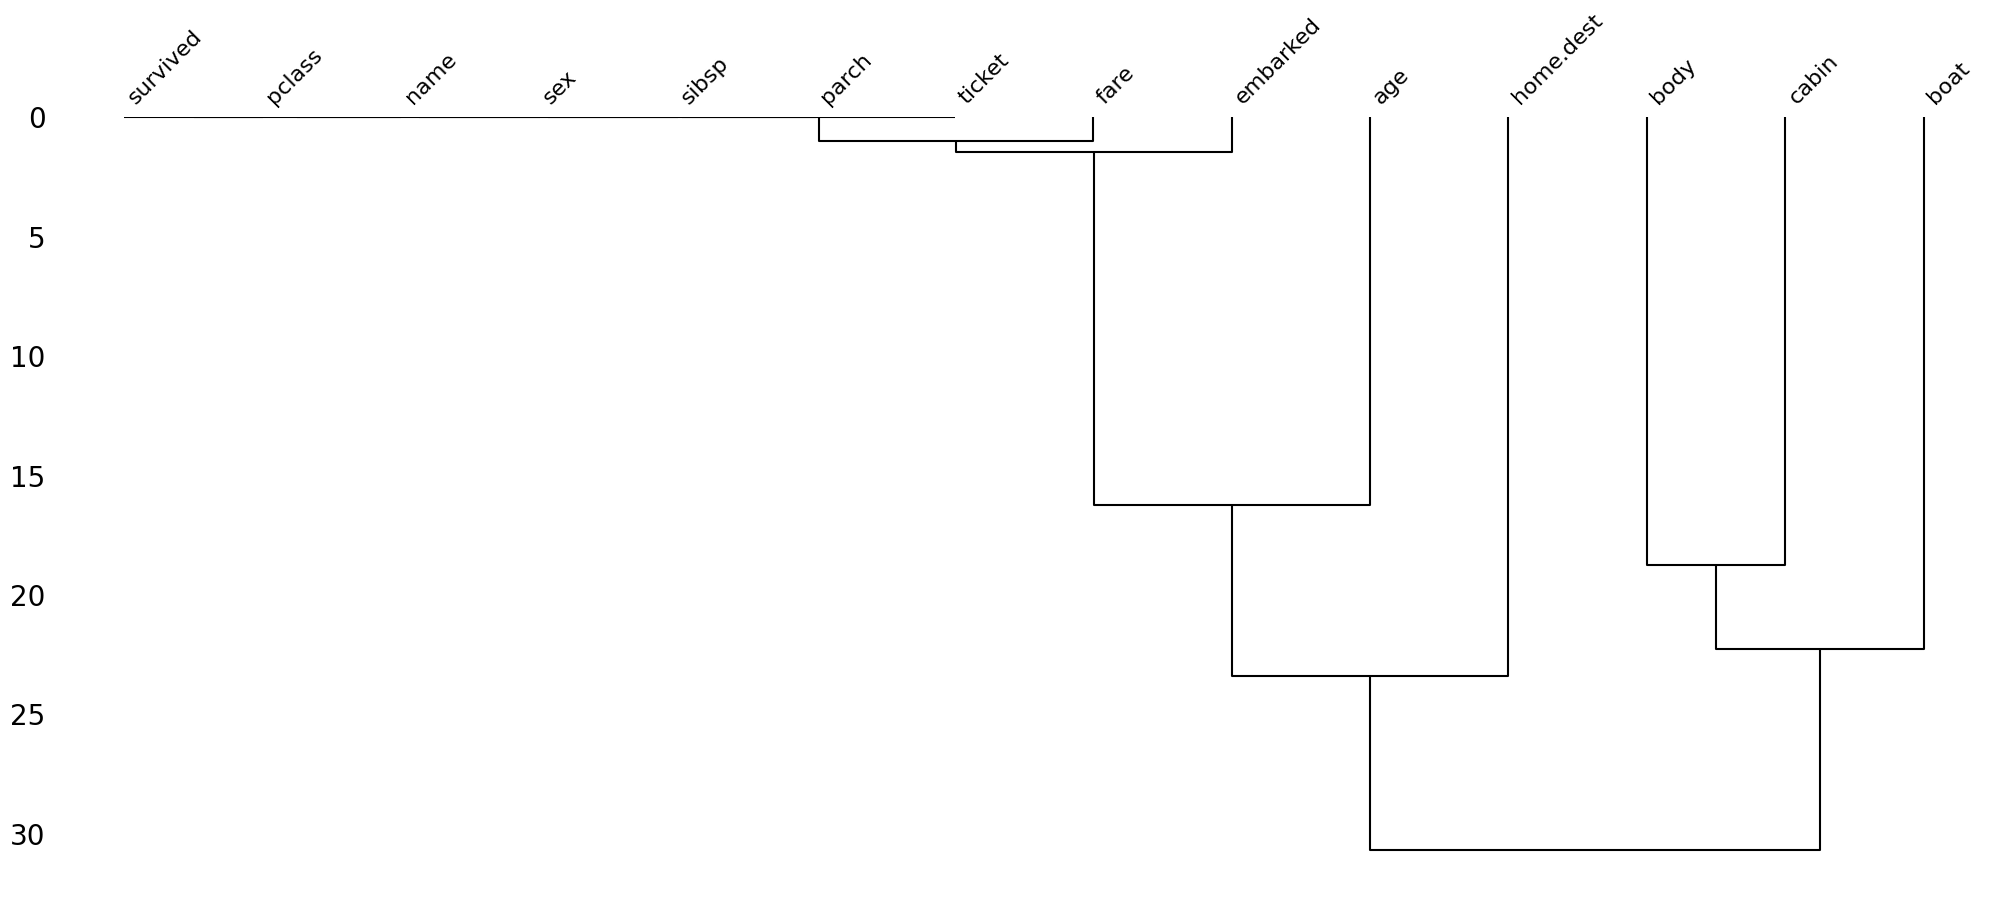

In [14]:
# Create dendogram showing the clusterings of where the data is missing
ax = msno.dendrogram(df)

### Dropping Missing Data

In [16]:
df1 = df.dropna()

In [17]:
df1 = df.drop(columns = "cabin")

In [18]:
df1 = df.dropna(axis=1)

### Imputing Data

In [25]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include='number').columns
im = SimpleImputer() # mean
df[num_cols] = im.fit_transform(df[num_cols])


In [26]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body            0
home.dest     564
dtype: int64

### Adding Indicator Columns

In [30]:
# Too add a new column as an indicator of missing data within another column
def add_indicator(col):
    def wrapper(df):
        return df[col].isna().astype(int)
    return wrapper

df1 = df.assign(
    cabin_missing=add_indicator("cabin"))

In [29]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cabin_missing
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,160.809917,"St Louis, MO",0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,160.809917,"Montreal, PQ / Chesterville, ON",0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.000000,"Montreal, PQ / Chesterville, ON",0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,160.809917,"Montreal, PQ / Chesterville, ON",0
